## 사용 패키지

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.ensemble import RandomForestRegressor

from pycaret.regression import *

## 데이터 로드

In [2]:
train = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/train.csv')
test = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/test.csv')
submission = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')

# temp = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/진주체감온도.csv')
# rain = pd.read_csv(('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/진주강수.csv'))

In [12]:
train.corr()

본사정원수    본사휴가자수    본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
본사정원수           1.000000  0.244666 -0.061688        0.146544     0.452293   
본사휴가자수          0.244666  1.000000 -0.273318       -0.230789     0.065397   
본사출장자수         -0.061688 -0.273318  1.000000       -0.308757    -0.352643   
본사시간외근무명령서승인건수  0.146544 -0.230789 -0.308757        1.000000     0.156792   
현본사소속재택근무자수     0.452293  0.065397 -0.352643        0.156792     1.000000   
중식계            -0.115529 -0.391975 -0.512680        0.535611     0.076509   
석식계            -0.173852 -0.316894 -0.188164        0.571168    -0.057534   

                     중식계       석식계  
본사정원수          -0.115529 -0.173852  
본사휴가자수         -0.391975 -0.316894  
본사출장자수         -0.512680 -0.188164  
본사시간외근무명령서승인건수  0.535611  0.571168  
현본사소속재택근무자수     0.076509 -0.057534  
중식계             1.000000  0.508287  
석식계             0.508287  1.000000

## `요일 랭크지정 방식.`
## 석식에만 적용! 석식 수요일이 자기개발의 날 때문에 적어서.

In [3]:
weekdayrankfordinner = {
    '월' : 1,
    '화' : 2,
    '수' : 5,
    '목' : 3,
    '금' : 4
} 

train['요일(석식)'] = train['요일'].map(weekdayrankfordinner)
test['요일(석식)'] = test['요일'].map(weekdayrankfordinner)

## `월, 일을 숫자형으로 변환`

In [4]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

print(train['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.isocalendar().week
train['요일'] = train['일자'].dt.weekday


test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.isocalendar().week
test['요일'] = test['일자'].dt.weekday

train['주'] = train['주'].astype('int') # '주'의 타입이 Uint로 사용이 안되어 int로 변경해줌.
test['주'] = test['주'].astype('int')



0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]


## `0712 비율변수 추가`

## `월 랭크지정 방식` 낮은게 12 큰게 1 요일 랭크와 동일

In [5]:
month1 = {
    1:3,
    2:1,
    3:2,
    4:6,
    5:7,
    6:8,
    7:10,
    8:9,
    9:5,
    10:4,
    11:11,
    12:12
}

month2 = {
    1:11,
    2:2,
    3:1,
    4:4,
    5:8,
    6:6,
    7:9,
    8:7,
    9:5,
    10:3,
    11:10,
    12:12
}
train['월(중식)'] = train['월'].map(month1)
test['월(중식)'] = test['월'].map(month1)

train['월(석식)'] = train['월'].map(month2)
test['월(석식)'] = test['월'].map(month2)

train['월(중식)'] = train['월(중식)'].astype('int') # float형이라 int로 변경
test['월(중식)'] = test['월(중식)'].astype('int')
train['월(석식)'] = train['월(석식)'].astype('int')
test['월(석식)'] = test['월(석식)'].astype('int')

## `주 랭크지정 방식`


In [6]:
# #중식
# week1 = {
#     52	:	52	,
#     31	:	51	,
#     33	:	50	,
#     30	:	49	,
#     32	:	48	,
#     18	:	47	,
#     46	:	46	,
#     45	:	45	,
#     47	:	44	,
#     21	:	43	,
#     44	:	42	,
#     23	:	41	,
#     51	:	40	,
#     43	:	39	,
#     28	:	38	,
#     29	:	37	,
#     42	:	36	,
#     24	:	35	,
#     17	:	34	,
#     22	:	33	,
#     26	:	32	,
#     25	:	31	,
#     27	:	30	,
#     20	:	29	,
#     15	:	28	,
#     14	:	27	,
#     16	:	26	,
#     50	:	25	,
#     19	:	24	,
#     1	:	23	,
#     3	:	22	,
#     39	:	21	,
#     36	:	20	,
#     48	:	19	,
#     2	:	18	,
#     4	:	17	,
#     37	:	16	,
#     34	:	15	,
#     13	:	14	,
#     49	:	13	,
#     35	:	12	,
#     38	:	11	,
#     12	:	10	,
#     11	:	9	,
#     6	:	8	,
#     5	:	7	,
#     9	:	6	,
#     8	:	5	,
#     10	:	4	,
#     41	:	3	,
#     7	:	2	,
#     40	:	1	
# }

# #석식 위부터 작은수임

# week2 = {
#     52	:	52	,
#     1	:	51	,
#     31	:	50	,
#     4	:	49	,
#     48	:	48	,
#     30	:	47	,
#     26	:	46	,
#     51	:	45	,
#     43	:	44	,
#     44	:	43	,
#     46	:	42	,
#     2	:	41	,
#     17	:	40	,
#     22	:	39	,
#     33	:	38	,
#     39	:	37	,
#     29	:	36	,
#     3	:	35	,
#     32	:	34	,
#     45	:	33	,
#     18	:	32	,
#     5	:	31	,
#     47	:	30	,
#     35	:	29	,
#     23	:	28	,
#     28	:	27	,
#     37	:	26	,
#     21	:	25	,
#     19	:	24	,
#     27	:	23	,
#     24	:	22	,
#     42	:	21	,
#     9	:	20	,
#     20	:	19	,
#     38	:	18	,
#     50	:	17	,
#     25	:	16	,
#     13	:	15	,
#     16	:	14	,
#     49	:	13	,
#     12	:	12	,
#     36	:	11	,
#     15	:	10	,
#     14	:	9	,
#     34	:	8	,
#     6	:	7	,
#     11	:	6	,
#     8	:	5	,
#     7	:	4	,
#     41	:	3	,
#     10	:	2	,
#     40	:	1	
# }

# train['주(중식)'] = train['주'].map(week1)
# test['주(중식)'] = test['주'].map(week1)

# train['주(석식)'] = train['주'].map(week2)
# test['주(석식)'] = test['주'].map(week2)

# train['주(중식)'] = train['주(중식)'].astype('int') # float형이라 int로 변경
# test['주(중식)'] = test['주(중식)'].astype('int')
# train['주(석식)'] = train['주(석식)'].astype('int')
# test['주(석식)'] = test['주(석식)'].astype('int')

## `연도 랭크지정 방식` 효과 X

In [7]:
# year1 = {
#     2021 : 1,
#     2016 : 3,
#     2017 : 2,
#     2018 : 4,
#     2020 : 5,
#     2019 : 6
# }


# year2 = {
#     2016 : 1,
#     2017 : 3,
#     2018 : 2,
#     2019 : 4,
#     2020 : 5,
#     2021 : 6
# }





# train['년(중식)'] = train['년'].map(year1)
# test['년(중식)'] = test['년'].map(year1)

# train['년(석식)'] = train['년'].map(year2)
# test['년(석식)'] = test['년'].map(year2)

# train['년(중식)'] = train['년(중식)'].astype('int') # float형이라 int로 변경
# test['년(중식)'] = test['년(중식)'].astype('int')
# train['년(석식)'] = train['년(석식)'].astype('int')
# test['년(석식)'] = test['년(석식)'].astype('int')

## `일 랭크지정방식 ` 효과 X 사용안함

## `식사가능자수`

In [8]:
train['식사가능자수'] = (train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'])
test['식사가능자수'] = (test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'])

In [9]:
train['식사가능자수']

0       2551.0
1       2551.0
2       2545.0
3       2497.0
4       2323.0
         ...  
1200    2517.0
1201    2540.0
1202    2425.0
1203    2549.0
1204    2552.0
Name: 식사가능자수, Length: 1205, dtype: float64

# `0708 공휴일 전후 추가 `

## `0713 공휴일 변경`

In [10]:
drops = ['조식메뉴', '중식메뉴', '석식메뉴']

train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)

In [11]:
#휴일
train['휴일전날'] = 0
test['휴일전날'] = 0

train['휴일다음날'] = 0
test['휴일다음날'] = 0

#연휴 (주말포함 3일이상 휴일)
train['연휴전날'] = 0
test['연휴전날'] = 0

train['연휴다음날'] = 0
test['연휴다음날'] = 0

In [12]:
train['휴일다음날'][train['요일'] == 0] = 1 # 월요일
test['휴일다음날'][test['요일'] == 0] = 1

train['휴일전날'][train['요일'] == 4] = 1 # 금요일
test['휴일전날'][test['요일'] == 4] = 1

# 2016년
train['휴일전날'][17] = 1
train['휴일전날'][47] = 1
train['휴일전날'][62] = 1
train['휴일전날'][17] = 1
train['휴일전날'][152] = 1

train['휴일다음날'][5] = 1
train['휴일다음날'][18] = 1
train['휴일다음날'][48] = 1
train['휴일다음날'][83] = 1
train['휴일다음날'][132] = 1
train['휴일다음날'][163] = 1

#2017년
train['휴일전날'][245] = 1
train['휴일전날'][268] = 1
train['휴일전날'][309] = 1
train['휴일전날'][310] = 1
train['휴일전날'][330] = 1
train['휴일전날'][379] = 1

train['휴일다음날'][227] = 1
train['휴일다음날'][246] = 1
train['휴일다음날'][267] = 1
train['휴일다음날'][309] = 1
train['휴일다음날'][310] = 1
train['휴일다음날'][331] = 1
train['휴일다음날'][380] = 1
train['휴일다음날'][413] = 1
train['휴일다음날'][467] = 1


#2018년
train['휴일전날'][502] = 1
train['휴일전날'][510] = 1
train['휴일전날'][555] = 1
train['휴일전날'][565] = 1
train['휴일전날'][575] = 1
train['휴일전날'][579] = 1
train['휴일전날'][623] = 1
train['휴일전날'][651] = 1
train['휴일전날'][705] = 1
train['휴일전날'][709] = 1

train['휴일다음날'][471] = 1
train['휴일다음날'][511] = 1
train['휴일다음날'][556] = 1
train['휴일다음날'][566] = 1
train['휴일다음날'][576] = 1
train['휴일다음날'][580] = 1
train['휴일다음날'][624] = 1
train['휴일다음날'][652] = 1
train['휴일다음날'][706] = 1


#2019년
train['휴일전날'][728] = 1
train['휴일전날'][814] = 1
train['휴일전날'][863] = 1
train['휴일전날'][882] = 1
train['휴일전날'][894] = 1
train['휴일전날'][897] = 1
train['휴일전날'][951] = 1
train['휴일전날'][893] = 1
train['휴일전날'][955] = 1

train['휴일다음날'][710] = 1
train['휴일다음날'][733] = 1
train['휴일다음날'][793] = 1
train['휴일다음날'][815] = 1
train['휴일다음날'][864] = 1
train['휴일다음날'][894] = 1
train['휴일다음날'][898] = 1
train['휴일다음날'][952] = 1
train['휴일다음날'][895] = 1


#2020년
train['휴일전날'][971] = 1
train['휴일전날'][1027] = 1
train['휴일전날'][1037] = 1
train['휴일전날'][1038] = 1
train['휴일전날'][1133] = 1
train['휴일전날'][1187] = 1

train['휴일다음날'][956] = 1
train['휴일다음날'][972] = 1
train['휴일다음날'][996] = 1
train['휴일다음날'][1028] = 1
train['휴일다음날'][1039] = 1

#2021년
test['휴일전날'][10] = 1
test['휴일다음날'][21] = 1



# # 원핫인코딩
# train = pd.get_dummies(train, columns=['공휴일전후'])
# test = pd.get_dummies(test, columns=['공휴일전후'])

# test['공휴일전후_0'][20] =1
# test['공휴일전후_1'][20] = 0

In [13]:
train.query('휴일전날 == 1').groupby('년').mean()[['중식계','석식계']]

중식계         석식계
년                           
2016  748.900000  492.980000
2017  663.851852  406.351852
2018  634.672414  400.327586
2019  638.372881  384.101695
2020  643.156863  293.686275
2021  669.000000  248.000000

In [14]:
train.query('연휴전날 == 1').groupby('년').mean()[['중식계','석식계']]

Empty DataFrame
Columns: [중식계, 석식계]
Index: []

In [15]:
train.query('휴일다음날 == 1').groupby('년').mean()[['중식계','석식계']]

중식계         석식계
년                            
2016  1168.280000  575.340000
2017  1123.854545  524.690909
2018  1098.293103  511.500000
2019  1100.491525  529.728814
2020  1129.720000  538.280000
2021  1271.000000  502.750000

In [16]:
train.query('연휴다음날 == 1').groupby('년').mean()[['중식계','석식계']]

Empty DataFrame
Columns: [중식계, 석식계]
Index: []

In [17]:
train['휴일다음날'][train['요일'] == 0] = 1
test['휴일다음날'][test['요일'] == 0] = 1

train['휴일전날'][train['요일'] == 4] = 1
test['휴일전날'][test['요일'] == 4] = 1


# 요일 원핫인코딩 
# train = pd.get_dummies(train, columns=['요일'])
# test = pd.get_dummies(test, columns=['요일'])
# 요일_0 : 월 / 요일_1 : 화 / 요일_2 : 수 / 요일_3 : 목 / 요일_4 : 금

In [18]:
train.groupby('휴일전날').mean()[['중식계','석식계']]

중식계         석식계
휴일전날                        
0     957.287097  481.979570
1     663.912727  393.436364

In [19]:
train.groupby('휴일다음날').mean()[['중식계','석식계']]

중식계         석식계
휴일다음날                         
0       820.696448  440.220667
1      1124.731884  534.315217

In [20]:
train.groupby('연휴전날').mean()[['중식계','석식계']]

중식계         석식계
연휴전날                       
0     890.33444  461.772614

In [21]:
train.groupby('연휴다음날').mean()[['중식계','석식계']]

중식계         석식계
연휴다음날                       
0      890.33444  461.772614

## `0714 연휴 전 후 추가(주말포함 3일이상 휴일)`

In [22]:
#2016
train['연휴전날'][4] = 1
#train['연휴전날'][82] = 1
train['연휴전날'][131] = 1
train['연휴전날'][152] = 1
#train['연휴전날'][162] = 1

train['연휴다음날'][5] = 1
train['연휴다음날'][83] = 1
train['연휴다음날'][132] = 1
train['연휴다음날'][153] = 1
train['연휴다음날'][163] = 1


#2017
train['연휴전날'][245] = 1
train['연휴전날'][309] = 1
train['연휴전날'][310] = 2
train['연휴전날'][412] = 1
#train['연휴전날'][466] = 1
train['연휴전날'][470] = 1

train['연휴다음날'][246] = 1
#train['연휴다음날'][309] = 1
#train['연휴다음날'][310] = 1
train['연휴다음날'][413] = 1
#train['연휴다음날'][467] = 1


#2018
train['연휴전날'][502] = 2
#train['연휴전날'][555] = 1
train['연휴전날'][650] = 1

train['연휴다음날'][471] = 1
train['연휴다음날'][503] = 1
train['연휴다음날'][556] = 1
train['연휴다음날'][651] = 1

#2019
train['연휴전날'][732] = 1
train['연휴전날'][748] = 1
train['연휴전날'][792] = 1
train['연휴전날'][882] = 1

train['연휴다음날'][733] = 1
#train['연휴다음날'][749] = 1
#train['연휴다음날'][793] = 1
train['연휴다음날'][883] = 1

#2020
train['연휴전날'][971] = 1
train['연휴전날'][1129] = 1
train['연휴전날'][1187] = 1

train['연휴다음날'][972] = 1
train['연휴다음날'][1130] = 1

#2021
test['연휴전날'][10] = 1
#test['연휴전날'][20] = 1 # 같은달에 설날이 있어서 휴가 제한


train['연휴다음날'][1188] = 1

test['연휴다음날'][11] = 1
test['연휴다음날'][21] = 1 


In [23]:
train.iloc[705]

일자                2018-12-24 00:00:00
요일                                  0
본사정원수                            2846
본사휴가자수                            894
본사출장자수                            159
본사시간외근무명령서승인건수                     26
현본사소속재택근무자수                       0.0
중식계                             296.0
석식계                             104.0
요일(석식)                              1
년                                2018
월                                  12
일                                  24
주                                  52
월(중식)                              12
월(석식)                              12
식사가능자수                         1952.0
휴일전날                                1
휴일다음날                               1
연휴전날                                0
연휴다음날                               0
Name: 705, dtype: object

## Feature

## `0714 연휴 전, 후` (주말포함 3일 이상 휴일)

In [25]:
x1_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일']] #중식계
x2_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일(석식)']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(중식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일']]
x2_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(석식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일(석식)']]

In [26]:
train.query('휴일전날 == 1')[['일자','요일','중식계','석식계']]

일자  요일     중식계    석식계
4    2016-02-05   4   925.0  330.0
6    2016-02-12   4   909.0  598.0
11   2016-02-19   4   763.0  597.0
16   2016-02-26   4   766.0  585.0
17   2016-02-29   0   869.0  344.0
20   2016-03-04   4   837.0  673.0
25   2016-03-11   4   728.0  591.0
30   2016-03-18   4   757.0  521.0
35   2016-03-25   4   861.0  523.0
40   2016-04-01   4   661.0  591.0
45   2016-04-08   4   764.0  542.0
47   2016-04-12   1   771.0  500.0
49   2016-04-15   4   579.0  582.0
54   2016-04-22   4   698.0  557.0
59   2016-04-29   4   652.0  507.0
62   2016-05-04   2   723.0  636.0
67   2016-05-13   4   761.0  517.0
72   2016-05-20   4   653.0  487.0
77   2016-05-27   4   660.0  493.0
82   2016-06-03   4   721.0  548.0
86   2016-06-10   4   697.0  509.0
91   2016-06-17   4   694.0  484.0
96   2016-06-24   4   805.0  475.0
101  2016-07-01   4   879.0  513.0
106  2016-07-08   4   863.0  534.0
111  2016-07-15   4   867.0  503.0
116  2016-07-22   4   661.0  501.0
121  2016-07-29   4   671.0  472.0
126  2016-08-05   4   641.0  448.0
131  2016-08-12   4   708.0  410.0
135  2016-08-19   4   754.0  532.0
140  2016-08-26   4   813.0  489.0
145  2016-09-02   4   832.0  460.0
150  2016-09-09   4   682.0  485.0
152  2016-09-13   1   820.0  238.0
157  2016-09-23   4   716.0  562.0
162  2016-09-30   4   843.0  539.0
166  2016-10-07   4   843.0  554.0
171  2016-10-14   4   898.0  544.0
176  2016-10-21   4   760.0  442.0
181  2016-10-28   4   731.0  475.0
186  2016-11-04   4   803.0  497.0
191  2016-11-11   4   652.0  426.0
196  2016-11-18   4   730.0  388.0
201  2016-11-25   4   720.0  392.0
206  2016-12-02   4   766.0  448.0
211  2016-12-09   4   621.0  416.0
216  2016-12-16   4   699.0  518.0
221  2016-12-23   4   560.0  398.0
226  2016-12-30   4   658.0  275.0
231  2017-01-06   4   830.0  523.0
236  2017-01-13   4   791.0  533.0
241  2017-01-20   4   709.0  446.0
245  2017-01-26   3   844.0  147.0
249  2017-02-03   4   854.0  582.0
254  2017-02-10   4   797.0  505.0
259  2017-02-17   4   753.0  494.0
264  2017-02-24   4   698.0  463.0
268  2017-03-03   4   926.0  578.0
273  2017-03-10   4   664.0  461.0
278  2017-03-17   4   625.0  429.0
283  2017-03-24   4   644.0  518.0
288  2017-03-31   4   639.0  420.0
293  2017-04-07   4   602.0  431.0
298  2017-04-14   4   541.0  402.0
303  2017-04-21   4   547.0  353.0
308  2017-04-28   4   575.0  362.0
309  2017-05-02   1   525.0  298.0
310  2017-05-04   3   383.0  262.0
314  2017-05-12   4   817.0  507.0
319  2017-05-19   4   662.0  414.0
324  2017-05-26   4   597.0  462.0
329  2017-06-02   4   699.0  480.0
330  2017-06-05   0   760.0  306.0
333  2017-06-09   4   715.0  460.0
338  2017-06-16   4   644.0  383.0
343  2017-06-23   4   609.0  441.0
348  2017-06-30   4   695.0  370.0
353  2017-07-07   4   613.0  472.0
358  2017-07-14   4   613.0  485.0
363  2017-07-21   4   648.0  410.0
368  2017-07-28   4   501.0  459.0
373  2017-08-04   4   668.0  354.0
378  2017-08-11   4   710.0  393.0
379  2017-08-14   0   692.0  275.0
382  2017-08-18   4   731.0  484.0
387  2017-08-25   4   594.0  354.0
392  2017-09-01   4   663.0    0.0
397  2017-09-08   4   662.0  494.0
402  2017-09-15   4   602.0  454.0
407  2017-09-22   4   735.0  490.0
412  2017-09-29   4   760.0    0.0
416  2017-10-13   4  1015.0  628.0
421  2017-10-20   4   533.0  416.0
426  2017-10-27   4   567.0  327.0
431  2017-11-03   4   644.0  406.0
436  2017-11-10   4   630.0  397.0
441  2017-11-17   4   640.0  332.0
446  2017-11-24   4   563.0  378.0
451  2017-12-01   4   660.0  381.0
456  2017-12-08   4   682.0  407.0
461  2017-12-15   4   618.0  426.0
466  2017-12-22   4   565.0  482.0
470  2017-12-29   4   394.0  209.0
474  2018-01-05   4   762.0  509.0
479  2018-01-12   4   679.0  398.0
484  2018-01-19   4   654.0  419.0
489  2018-01-26   4   722.0  418.0
494  2018-02-02   4   760.0  503.0
499  2018-02-09   4   724.0  518.0
502  2018-02-14   2   850.0    0.0
507  2018-02-23   4   651.0  522.0
510  2018-02-28   2   786.0    0.0
511  2018-03-02   4   5

In [27]:
train.query('휴일다음날 == 1')[['일자','요일','중식계','석식계']]

일자  요일     중식계    석식계
0    2016-02-01   0  1039.0  331.0
5    2016-02-11   3  1045.0  550.0
7    2016-02-15   0  1268.0  672.0
12   2016-02-22   0  1298.0  645.0
17   2016-02-29   0   869.0  344.0
18   2016-03-02   2  1127.0  631.0
21   2016-03-07   0  1326.0  625.0
26   2016-03-14   0  1286.0  586.0
31   2016-03-21   0  1030.0  605.0
36   2016-03-28   0  1193.0  637.0
41   2016-04-04   0  1237.0  614.0
46   2016-04-11   0  1225.0  536.0
48   2016-04-14   3   969.0  562.0
50   2016-04-18   0  1120.0  525.0
55   2016-04-25   0  1227.0  528.0
60   2016-05-02   0  1242.0  551.0
63   2016-05-09   0  1216.0  591.0
68   2016-05-16   0  1180.0  594.0
73   2016-05-23   0  1160.0  613.0
78   2016-05-30   0  1231.0  631.0
83   2016-06-07   1  1244.0  629.0
87   2016-06-13   0  1243.0  590.0
92   2016-06-20   0  1146.0  585.0
97   2016-06-27   0  1142.0  609.0
102  2016-07-04   0  1292.0  582.0
107  2016-07-11   0  1115.0  630.0
112  2016-07-18   0  1158.0  596.0
117  2016-07-25   0  1086.0  584.0
122  2016-08-01   0  1055.0  510.0
127  2016-08-08   0  1038.0  480.0
132  2016-08-16   1  1023.0  561.0
136  2016-08-22   0  1266.0  729.0
141  2016-08-29   0  1258.0  568.0
146  2016-09-05   0  1164.0  554.0
151  2016-09-12   0   924.0  504.0
153  2016-09-19   0  1271.0  662.0
158  2016-09-26   0  1185.0  710.0
163  2016-10-04   1  1262.0  902.0
167  2016-10-10   0  1180.0  546.0
172  2016-10-17   0  1196.0  527.0
177  2016-10-24   0  1171.0  600.0
182  2016-10-31   0  1224.0  540.0
187  2016-11-07   0  1156.0  506.0
192  2016-11-14   0  1260.0  539.0
197  2016-11-21   0  1235.0  616.0
202  2016-11-28   0  1246.0  623.0
207  2016-12-05   0  1110.0  560.0
212  2016-12-12   0  1069.0  544.0
217  2016-12-19   0  1215.0  482.0
222  2016-12-26   0  1192.0  328.0
227  2017-01-02   0  1273.0  559.0
232  2017-01-09   0  1322.0  620.0
237  2017-01-16   0  1273.0  571.0
242  2017-01-23   0  1152.0  509.0
246  2017-01-31   1  1240.0  680.0
250  2017-02-06   0  1319.0  768.0
255  2017-02-13   0  1364.0  689.0
260  2017-02-20   0  1216.0  648.0
265  2017-02-27   0  1141.0  563.0
267  2017-03-02   3  1057.0  593.0
269  2017-03-06   0  1311.0  658.0
274  2017-03-13   0  1295.0  596.0
279  2017-03-20   0  1328.0  556.0
284  2017-03-27   0  1114.0  501.0
289  2017-04-03   0  1258.0  577.0
294  2017-04-10   0  1218.0  541.0
299  2017-04-17   0  1237.0  479.0
304  2017-04-24   0  1109.0  531.0
309  2017-05-02   1   525.0  298.0
310  2017-05-04   3   383.0  262.0
311  2017-05-08   0   792.0  308.0
315  2017-05-15   0  1203.0  505.0
320  2017-05-22   0  1207.0  585.0
325  2017-05-29   0  1193.0  555.0
330  2017-06-05   0   760.0  306.0
331  2017-06-07   2  1127.0  549.0
334  2017-06-12   0  1140.0  552.0
339  2017-06-19   0  1126.0  489.0
344  2017-06-26   0  1147.0  539.0
349  2017-07-03   0  1231.0  501.0
354  2017-07-10   0  1084.0  527.0
359  2017-07-17   0  1168.0  500.0
364  2017-07-24   0  1119.0  486.0
369  2017-07-31   0   945.0  455.0
374  2017-08-07   0  1078.0  497.0
379  2017-08-14   0   692.0  275.0
380  2017-08-16   2   973.0  433.0
383  2017-08-21   0  1232.0  673.0
388  2017-08-28   0  1191.0  514.0
393  2017-09-04   0  1168.0  581.0
398  2017-09-11   0  1350.0  510.0
403  2017-09-18   0  1214.0  552.0
408  2017-09-25   0  1099.0  592.0
413  2017-10-10   1  1265.0  746.0
417  2017-10-16   0  1173.0  497.0
422  2017-10-23   0  1115.0  538.0
427  2017-10-30   0  1150.0  589.0
432  2017-11-06   0  1167.0  451.0
437  2017-11-13   0  1017.0  547.0
442  2017-11-20   0  1115.0  569.0
447  2017-11-27   0  1065.0  483.0
452  2017-12-04   0  1142.0  625.0
457  2017-12-11   0  1165.0  536.0
462  2017-12-18   0  1149.0  418.0
467  2017-12-26   1   915.0  176.0
471  2018-01-02   1  1148.0  432.0
475  2018-01-08   0  1178.0  554.0
480  2018-01-15   0  1256.0  480.0
485  2018-01-22   0  1241.0  492.0
490  2018-01-29   0  1417.0  689.0
495  2018-02-05   0  1372.0  673.0
500  2018-02-12   0  1251.0  541.0
503  2018-02-19   0  1298.0  657.0
508  2018-02-26   0  11

In [28]:
test.query('연휴전날 == 1')[['일자','요일']]

일자  요일
10 2021-02-10   2

In [49]:
train.query('요일 == 2 & 일 >=24')[['일자','중식계','석식계']]

일자     중식계    석식계
14   2016-02-24  1022.0  514.0
38   2016-03-30  1033.0  463.0
57   2016-04-27  1028.0  490.0
75   2016-05-25   938.0  454.0
99   2016-06-29   820.0  487.0
119  2016-07-27   872.0  423.0
138  2016-08-24   941.0  588.0
143  2016-08-31   915.0  498.0
160  2016-09-28  1128.0  591.0
179  2016-10-26   854.0  410.0
204  2016-11-30  1109.0    0.0
224  2016-12-28   767.0    0.0
244  2017-01-25   720.0    0.0
286  2017-03-29   966.0  474.0
306  2017-04-26   835.0    0.0
322  2017-05-24   852.0  387.0
327  2017-05-31   910.0    0.0
346  2017-06-28   745.0    0.0
366  2017-07-26   797.0    0.0
390  2017-08-30   898.0  395.0
410  2017-09-27  1023.0    0.0
424  2017-10-25   786.0    0.0
449  2017-11-29   903.0    0.0
468  2017-12-27   571.0    0.0
487  2018-01-24   845.0  274.0
492  2018-01-31  1138.0    0.0
510  2018-02-28   786.0    0.0
529  2018-03-28   926.0    0.0
549  2018-04-25   851.0    0.0
571  2018-05-30   876.0    0.0
589  2018-06-27   957.0    0.0
609  2018-07-25   760.0    0.0
633  2018-08-29   915.0    0.0
662  2018-10-24   777.0  464.0
667  2018-10-31   930.0    0.0
687  2018-11-28   862.0    0.0
706  2018-12-26   695.0    0.0
730  2019-01-30   679.0    0.0
747  2019-02-27   944.0    0.0
766  2019-03-27   856.0    0.0
786  2019-04-24  1034.0    0.0
809  2019-05-29   896.0    0.0
828  2019-06-26   946.0    0.0
848  2019-07-24   744.0  322.0
853  2019-07-31   619.0    0.0
872  2019-08-28   899.0    0.0
890  2019-09-25   803.0    0.0
912  2019-10-30   771.0    0.0
932  2019-11-27   732.0    0.0
973  2020-01-29  1197.0    0.0
993  2020-02-26  1105.0    0.0
1013 2020-03-25  1022.0  526.0
1037 2020-04-29   680.0  192.0
1054 2020-05-27   704.0  339.0
1087 2020-07-29   871.0  280.0
1106 2020-08-26   897.0  495.0
1146 2020-10-28   791.0  293.0
1166 2020-11-25  1146.0    0.0

## `앙상블 모델 적용 버전`

In [50]:
# 메뉴
train_lunch = pd.concat([x1_train, train['중식계']], axis = 1) # concat cbind 역할
train_dinner = pd.concat([x2_train, train['석식계']], axis = 1)
test_lunch = pd.concat([x1_test], axis = 1)
test_dinner = pd.concat([x2_test], axis = 1)
print('done')

done


### 중식 모델링

In [51]:
reg = setup(data=pd.concat([x1_train,train['중식계']], axis=1), # concat cbind 역할
            target='중식계',
            numeric_impuzzztation = 'mean',
            normalize = True,
            silent= True)
print('done')

done


In [52]:
best_5_l = compare_models(sort='MAE', n_select=5)
print('done')

done


In [53]:
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)

pred_esb_l = predict_model(final_model_l, test_lunch)

pred_esb_l['Label']

submission_esb = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')
submission_esb['중식계'] = pred_esb_l['Label']

print('done')

done


### 석식모델링

In [54]:
reg = setup(data=pd.concat([x2_train,train['석식계']], axis=1), # concat cbind 역할
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

done


In [55]:
best_5_d = compare_models(sort = 'MAE', n_select = 5)
print('done')

done


In [56]:
blended_d = blend_models(estimator_list = best_5_d, fold = 5, optimize = 'MAE')
pred_holdout = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
pred_esb_d = predict_model(final_model_d, test_dinner)
print('done')

done


In [57]:
pred_esb_d = predict_model(final_model_d, test_dinner)

In [58]:
submission_esb['석식계'] = pred_esb_d['Label']
submission_esb

일자          중식계         석식계
0   2021-01-27  1004.484226  111.215778
1   2021-01-28   937.735828  472.229531
2   2021-01-29   606.039135  232.362009
3   2021-02-01  1239.720875  574.695601
4   2021-02-02   998.589474  554.925628
5   2021-02-03  1062.948977  514.799721
6   2021-02-04  1008.803767  554.574583
7   2021-02-05   706.497307  397.679265
8   2021-02-08  1280.311580  689.646731
9   2021-02-09  1046.533028  581.580646
10  2021-02-10   854.985369  198.252054
11  2021-02-15  1275.063215  693.319975
12  2021-02-16  1097.861099  688.934854
13  2021-02-17  1052.973653  462.764067
14  2021-02-18   926.664791  578.389227
15  2021-02-19   690.927663  383.425118
16  2021-02-22  1300.680762  710.231104
17  2021-02-23  1085.052597  665.819958
18  2021-02-24   988.250149  399.012981
19  2021-02-25   928.358087  587.015326
20  2021-02-26   655.455880  341.027688
21  2021-03-02  1238.476458  704.068171
22  2021-03-03  1028.436331  565.448132
23  2021-03-04  1000.926441  626.677265
24  2021-03-05   661.266719  436.609326
25  2021-03-08  1324.679410  752.405004
26  2021-03-09  1105.394489  720.967348
27  2021-03-10  1020.644398  514.267513
28  2021-03-11  1005.205905  637.939432
29  2021-03-12   681.378430  391.033725
30  2021-03-15  1273.609182  723.721635
31  2021-03-16  1019.529010  653.261648
32  2021-03-17  1018.003986  486.534545
33  2021-03-18   922.052673  565.363665
34  2021-03-19   667.634030  354.817311
35  2021-03-22  1215.284996  676.569731
36  2021-03-23   978.583830  654.414963
37  2021-03-24   965.890638  388.805299
38  2021-03-25   928.207661  530.672692
39  2021-03-26   629.566201  330.780901
40  2021-03-29  1207.521370  678.541632
41  2021-03-30  1026.510135  658.366262
42  2021-03-31  1031.561236  422.752171
43  2021-04-01   891.361113  514.839112
44  2021-04-02   652.782608  377.368031
45  2021-04-05  1189.690170  615.317173
46  2021-04-06   973.475077  569.455905
47  2021-04-07   977.674289  483.212931
48  2021-04-08   901.399510  512.325148
49  2021-04-09   650.432158  372.016691

In [59]:
submission_esb.to_csv('ensembleW.csv', index = False)

- 0708 23:11

randomforest default mae로 바꿈(대회 측정방식)->mae:73 mse:66 오히려 mse가 더 좋게나왔음..

- 0709 00:28

출장자수 변수추가했더니 1점 높게나옴. 추가할 것

- 0709 20:35
    
체감온도 추가 효과 오히려 감소

- 0709 21:38

월 매핑 -> 0.5점 상승! 체감온도는 그냥 뺐음..

---
- 0710 01:51

앙상블 모델 적용.
효과는 안좋았음. 테스트용으로만 써보자.


`중식` 중식개선필요.

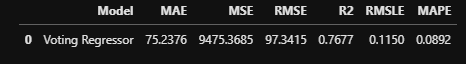

`석식`

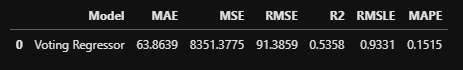

---
- 0711 13:59
    
월 매핑 제대로 안돼있었음.. 수정 후 제출! 63.792 `최고기록`

`중식`

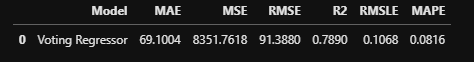

`석식`

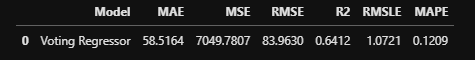


---
- 0711 14:46

연도 매핑 후 연도 추가. 중식은 성능 안좋길래 석식만 넣고 제출 그런데 결과는 68점; 연도 다시 제거!!

`중식`

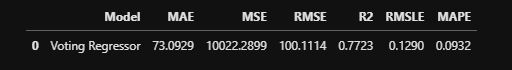

`석식`

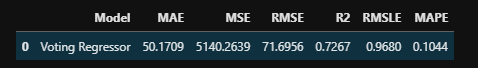

---
- 0711 17:03

일 매핑. 결과 안좋음.. 제거!

---
- 0711 17:26
    
휴가자수 식사가능자수에서 뺐지만 따로 추가해주었음. 파일명 : ensembleVacc.csv

`중식`

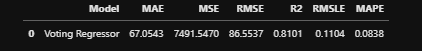

`석식` 

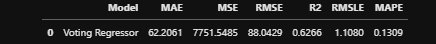

---
- 0711 17:51
    
식사가능자수 <- 식사가능자수/본사정원수로 잠시 변경, 휴가자수도 뺌

`중식`

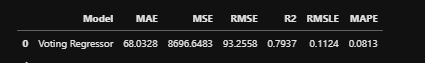

`석식`

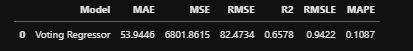

제출결과 안좋음.. 다시 복구

---
- 0712 00:23

휴가자수 임의로 더한걸 뺀다고 생각하고 출장자수를 없앴었음.... 그래서 계속 작게나옴;

이번엔 주, 년을 모두 추가하고 돌려봤다./ 해사꺼 비율시리즈 다 추가했더니 72점나옴.....

`중식`

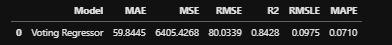

`석식`

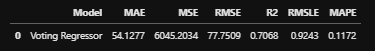

---
- 0712 01:15
    
최고기록에 주 랭크매핑 후 제출. 66.195점.. 낮게나옴



`중식`

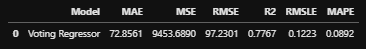

`석식`

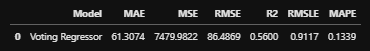

---
- 0714 
일 대신 주를 넣어서 비교.

`일을넣은 앙상블`

중식

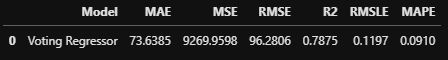

석식

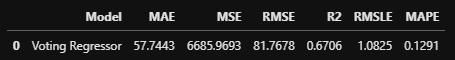

`주를넣은 앙상블`


중식

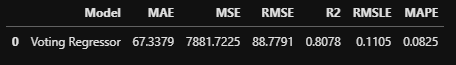

석식

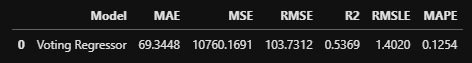

중식은 주를 넣고 석식은 일을 넣어보자 > 3점 더 안좋게나옴.. 그대로 일을 쓰자..

---
0715 0000

요일 더미 vs 요일 랭크 비교.

요일 랭크한게 더 점수가 좋음. 랭크사용!

---
0715 1700

여기서 '연휴' = 주말을 포함해서 휴일이 연속적으로 3일 이상일 때

비교해볼것 : 휴일 , 연휴 전날 다음날 다넣은거 / 휴일 , 연휴 전날만 넣은거  / 연휴만 넣은거 / 휴일만 넣은거
    
1.



2.

3.

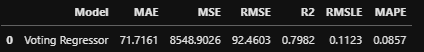

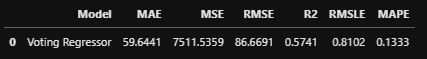

4.


---
연휴 전날만 넣은거

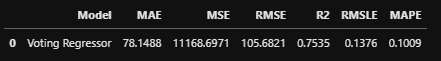

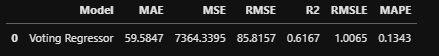


# `Catboost + Kfold`

# `Catboost 만 `

In [30]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

model1 = cat
model2 = cat

model1.fit(x1_train, y1_train) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train) #석식계
pred2 = model2.predict(x2_test)

submission['중식계'] = pred1
submission['석식계'] = pred2


submission.to_csv('catholi_day2.csv', index=False)


Learning rate set to 0.040347
0:	learn: 203.9071207	total: 137ms	remaining: 2m 16s
1:	learn: 198.9273849	total: 140ms	remaining: 1m 9s
2:	learn: 193.9344252	total: 142ms	remaining: 47.2s
3:	learn: 189.3167498	total: 144ms	remaining: 35.9s
4:	learn: 184.7900316	total: 146ms	remaining: 29.1s
5:	learn: 180.3309620	total: 149ms	remaining: 24.7s
6:	learn: 176.1494709	total: 151ms	remaining: 21.4s
7:	learn: 172.1404870	total: 153ms	remaining: 19s
8:	learn: 168.3577955	total: 155ms	remaining: 17.1s
9:	learn: 164.9905109	total: 157ms	remaining: 15.6s
10:	learn: 161.6151777	total: 160ms	remaining: 14.4s
11:	learn: 158.3479815	total: 162ms	remaining: 13.3s
12:	learn: 155.2781016	total: 164ms	remaining: 12.5s
13:	learn: 152.4388428	total: 166ms	remaining: 11.7s
14:	learn: 149.7354445	total: 168ms	remaining: 11.1s
15:	learn: 147.2379096	total: 171ms	remaining: 10.5s
16:	learn: 144.5819088	total: 173ms	remaining: 10s
17:	learn: 142.2954025	total: 175ms	remaining: 9.57s
18:	learn: 139.9405204	total:

In [78]:
submission

일자          중식계         석식계
0   2021-01-27  1011.815281  127.264072
1   2021-01-28   952.196250  485.857827
2   2021-01-29   617.995745  211.180386
3   2021-02-01  1217.926335  554.960724
4   2021-02-02  1021.782263  536.357697
5   2021-02-03  1058.861313  519.371199
6   2021-02-04  1004.468807  551.301265
7   2021-02-05   756.119928  356.285132
8   2021-02-08  1270.010553  662.623204
9   2021-02-09  1069.941288  567.971509
10  2021-02-10   888.295826  188.534392
11  2021-02-15  1215.738570  680.944782
12  2021-02-16  1035.865102  672.871361
13  2021-02-17  1034.254734  483.990480
14  2021-02-18   921.789533  573.593020
15  2021-02-19   721.156437  366.447887
16  2021-02-22  1266.375091  746.190039
17  2021-02-23  1067.312884  673.672438
18  2021-02-24   963.073704  396.834896
19  2021-02-25   912.105118  578.522549
20  2021-02-26   669.064836  321.733396
21  2021-03-02  1243.003018  725.496583
22  2021-03-03  1046.033679  561.359069
23  2021-03-04   991.421540  633.175105
24  2021-03-05   694.141334  448.694846
25  2021-03-08  1335.073184  763.388423
26  2021-03-09  1188.668445  739.527086
27  2021-03-10  1057.480140  511.848547
28  2021-03-11  1018.522574  634.278824
29  2021-03-12   689.510754  346.614056
30  2021-03-15  1240.495269  715.910851
31  2021-03-16   987.521633  629.346467
32  2021-03-17  1005.505876  509.061491
33  2021-03-18   927.621920  550.410739
34  2021-03-19   685.884597  269.797907
35  2021-03-22  1183.812451  699.796728
36  2021-03-23   963.069056  648.375611
37  2021-03-24   962.502701  320.847008
38  2021-03-25   909.757258  530.596972
39  2021-03-26   649.939401  247.560912
40  2021-03-29  1188.223359  680.052382
41  2021-03-30  1050.582774  668.126061
42  2021-03-31  1089.023713  428.718742
43  2021-04-01   898.894764  526.017612
44  2021-04-02   650.487010  315.500091
45  2021-04-05  1183.970841  606.774409
46  2021-04-06   990.045880  575.863200
47  2021-04-07   998.168537  518.494316
48  2021-04-08   899.171054  519.503985
49  2021-04-09   650.359758  342.236903

In [32]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

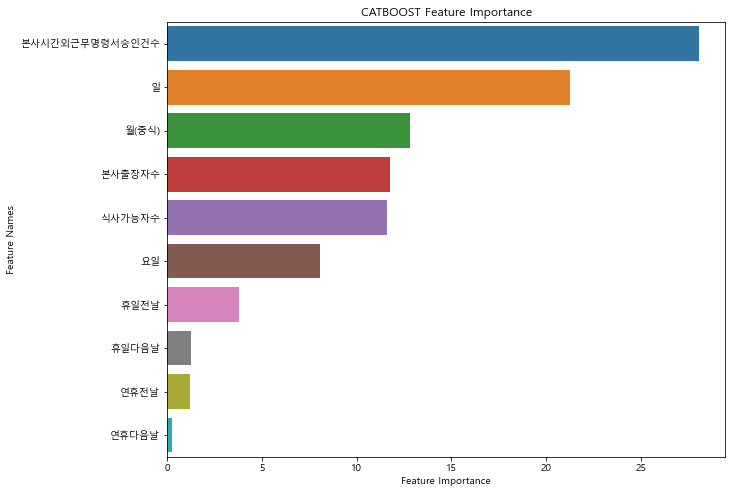

In [33]:
plot_feature_importance(model1.get_feature_importance(),x1_test.columns,'CATBOOST')

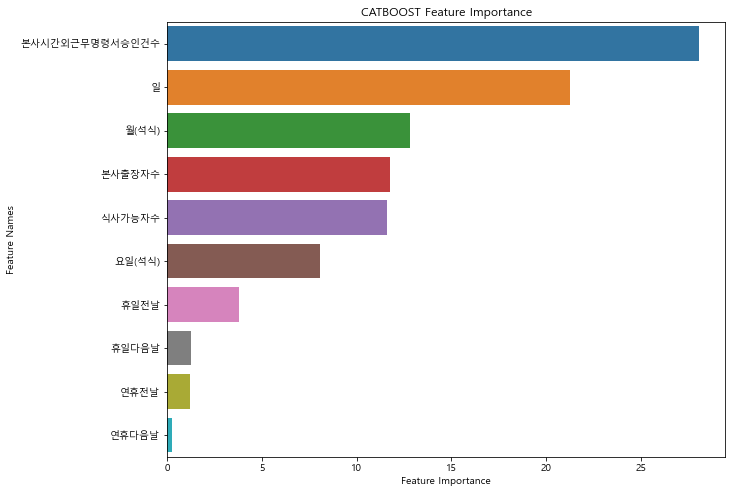

In [34]:
plot_feature_importance(model2.get_feature_importance(),x2_test.columns,'CATBOOST')

In [37]:
str_expr = "일 >= 25 & 요일 == 2" 

In [49]:
train.query( "일 >= 25 & 요일 == 2 & 석식계 != 0 & 년>2016" )[['석식계']].mean()

석식계    374.25
dtype: float64

In [47]:
train.query("일 <= 25 & 요일==2 & ")[['석식계']].mean()

석식계    413.642857
dtype: float64

In [57]:
train.query("일>=24 & 요일 ==2")[['일자','석식계','휴일전날','휴일다음날']].query("휴일전날==1 or 휴일다음날==1") # 휴일때문에 적은건지.. 체크

일자    석식계  휴일전날  휴일다음날
510  2018-02-28    0.0     1      0
706  2018-12-26    0.0     0      1
1037 2020-04-29  192.0     1      0

In [63]:
train.query("석식계==0")[['일자','요일','휴일전날','휴일다음날','본사휴가자수']]

일자  요일  휴일전날  휴일다음날  본사휴가자수
204  2016-11-30   2     0      0      68
224  2016-12-28   2     0      0     166
244  2017-01-25   2     0      0      79
262  2017-02-22   2     0      0      75
281  2017-03-22   2     0      0      53
306  2017-04-26   2     0      0      45
327  2017-05-31   2     0      0      43
346  2017-06-28   2     0      0      58
366  2017-07-26   2     0      0     254
392  2017-09-01   4     1      0     177
410  2017-09-27   2     0      0      70
412  2017-09-29   4     1      0     214
424  2017-10-25   2     0      0      75
449  2017-11-29   2     0      0      78
468  2017-12-27   2     0      0     169
492  2018-01-31   2     0      0      56
502  2018-02-14   2     1      0     418
510  2018-02-28   2     1      0     134
529  2018-03-28   2     0      0      45
549  2018-04-25   2     0      0      66
571  2018-05-30   2     0      0      80
589  2018-06-27   2     0      0      66
609  2018-07-25   2     0      0     226
633  2018-08-29   2     0      0     103
648  2018-09-19   2     0      0      77
667  2018-10-31   2     0      0     111
687  2018-11-28   2     0      0      69
706  2018-12-26   2     0      1     184
730  2019-01-30   2     0      0      66
747  2019-02-27   2     0      0     100
766  2019-03-27   2     0      0      92
786  2019-04-24   2     0      0      59
809  2019-05-29   2     0      0      50
828  2019-06-26   2     0      0      69
853  2019-07-31   2     0      0     495
872  2019-08-28   2     0      0     123
890  2019-09-25   2     0      0      60
912  2019-10-30   2     0      0     122
932  2019-11-27   2     0      0     134
955  2019-12-31   1     1      0     709
973  2020-01-29   2     0      0     101
993  2020-02-26   2     0      0     109
1166 2020-11-25   2     0      0     206